In [52]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Affinity-City-Daily-final.csv').drop(['spend_all'], axis=1)

In [19]:
col = data.columns
y = data[data.columns[5]]
X = data[[col[4], col[6], col[7], col[8]]]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [55]:
regressioner = Pipeline([
        ("scale", StandardScaler()),
        ("degree1", PolynomialFeatures(degree=1, include_bias=False)),
        ("estimate", LinearRegression()),
    ])
regressioner.fit(X_train, y_train)
y_train_pred, y_test_pred = regressioner.predict(X_train), regressioner.predict(X_test)
MSE_train, MSE_test = mse(y_train, y_train_pred), mse(y_test, y_test_pred)
print("MSE for train data = {} and MSE for test data = {}".format(MSE_train, MSE_test))

MSE for train data = 0.02010277070078619 and MSE for test data = 0.02120095886186051


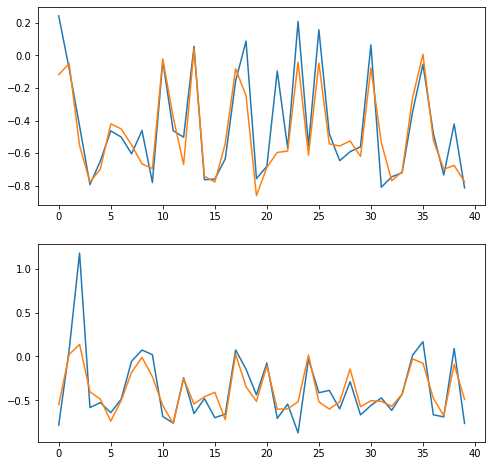

In [49]:
fig, axs = plt.subplots(2,1, figsize=(8,8))
ax1, ax2 = axs.flatten()

num_plot_points = 40

x1 = np.arange(num_plot_points)
ax1.plot(x1, y_train[:num_plot_points])
ax1.plot(x1, y_train_pred[:num_plot_points])

x2 = np.arange(num_plot_points)
ax2.plot(x2, y_test[:num_plot_points])
ax2.plot(x2, y_test_pred[:num_plot_points])

In [60]:
y_train

1952     0.2420
962     -0.0815
11972   -0.4330
4478    -0.7930
3502    -0.6480
          ...  
7735    -0.5940
696      0.0376
3879    -0.6950
6545    -0.5830
2130    -0.0858
Name: spend_aer, Length: 6125, dtype: float64

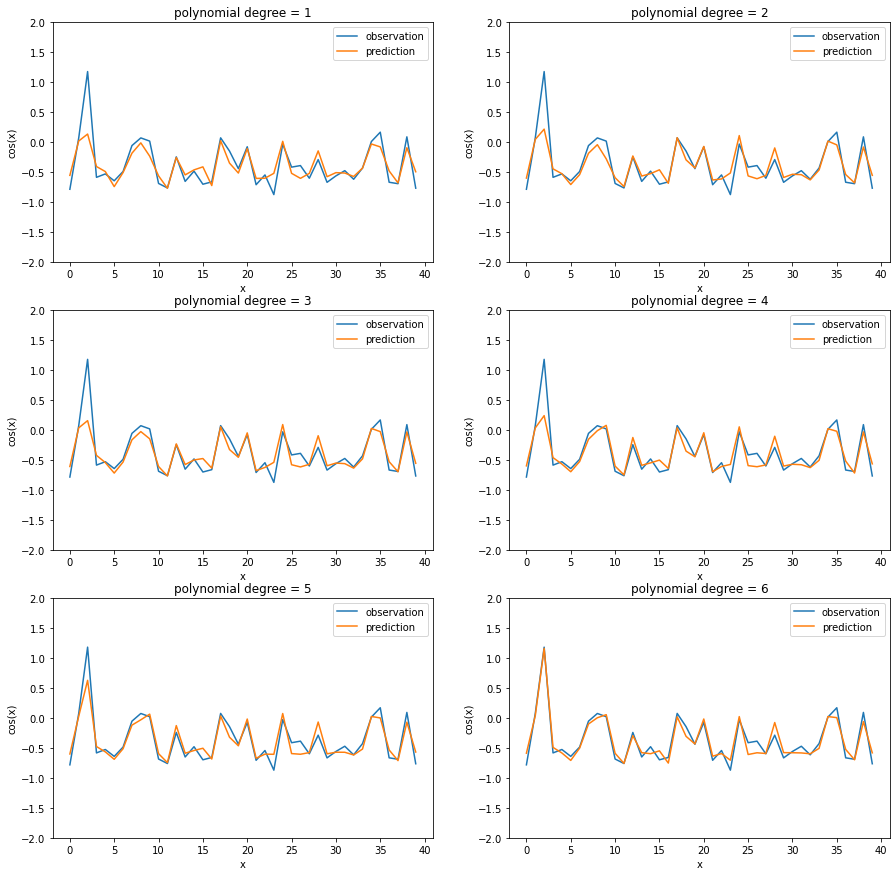

In [73]:
degrees = np.arange(1, 7)
fig, axs = plt.subplots(3,2, figsize=(15,15))
axs = axs.flatten()
MSE_trains = []
MSE_tests = []

for i, deg in enumerate(degrees):
    regressioner = Pipeline([
        ("scale", StandardScaler()),
        ("degree1", PolynomialFeatures(degree=deg, include_bias=False)),
        ("estimate", LinearRegression())
    ])
    regressioner.fit(X_train, y_train)
    y_train_pred, y_test_pred = regressioner.predict(X_train), regressioner.predict(X_test)
    MSE_train, MSE_test = mse(y_train, y_train_pred), mse(y_test, y_test_pred)
    MSE_trains.append(MSE_train)
    MSE_tests.append(MSE_test)
    
    num_plot_points = 40
    x = np.arange(num_plot_points)
    axs[i].plot(x, y_test[:num_plot_points], label='observation')
    axs[i].plot(x, y_test_pred[:num_plot_points], label='prediction')
    axs[i].set_ylim(-2, 2)
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('cos(x)')
    axs[i].set_title('polynomial degree = ' + str(deg))
    axs[i].legend()